## Setup

In [1]:
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
import numpy as np
import json
import pandas as pd
from scipy import stats
import os

## Parameters

In [2]:
transboostler_results_filename = 'transboostler_curves_folds_revision'
rdnb_results_filename = 'rdnb_curves_folds'
confusion_matrix_filename = 'transboostler_confusion_matrix_revision'

experiments = [
            {'id': '1', 'source':'imdb', 'target':'uwcse', 'predicate':'workedunder', 'to_predicate':'advisedby', 'arity': 2},
            {'id': '2', 'source':'uwcse', 'target':'imdb', 'predicate':'advisedby', 'to_predicate':'workedunder', 'arity': 2},
            {'id': '3', 'source':'imdb', 'target':'cora', 'predicate':'workedunder', 'to_predicate':'samevenue', 'arity': 2},
            {'id': '4', 'source':'cora', 'target':'imdb', 'predicate':'samevenue', 'to_predicate':'workedunder', 'arity': 2},
            ##{'id': '5', 'source':'uwcse', 'target':'cora', 'predicate':'advisedby', 'to_predicate':'samevenue', 'arity': 2},
            ##{'id': '6', 'source':'cora', 'target':'uwcse', 'predicate':'samevenue', 'to_predicate':'advisedby', 'arity': 2},
            {'id': '7', 'source':'yeast', 'target':'twitter', 'predicate':'proteinclass', 'to_predicate':'accounttype', 'arity': 2},
            {'id': '8', 'source':'twitter', 'target':'yeast', 'predicate':'accounttype', 'to_predicate':'proteinclass', 'arity': 2},
            {'id': '9', 'source':'nell_sports', 'target':'nell_finances', 'predicate':'teamplayssport', 'to_predicate':'companyeconomicsector', 'arity': 2},
            {'id': '10', 'source':'nell_finances', 'target':'nell_sports', 'predicate':'companyeconomicsector', 'to_predicate':'teamplayssport', 'arity': 2}
]

## Data Loader

In [3]:
def load_data(experiments, filename):
    data = {}
    for item in experiments[:-1]:
        experiment_title = item['id'] + '_' + item['source'] + '_' + item['target']
        if os.path.isfile(os.getcwd() + '/experiments/' + experiment_title + '/' + filename + '.json'):
            with open(os.getcwd() + '/experiments/' + experiment_title + '/' + filename + '.json', 'r') as fp:
                results = json.load(fp)
                data[experiment_title] = results['fasttext']
    return data

## Execution

In [5]:
data = load_data(experiments, transboostler_results_filename)
#rdnb_data = load_data(experiments, rdnb_results_filename)

for metric in ['AUC ROC', 'AUC PR', 'CLL', 'Learning Time']: #, 'Recall', 'F1', 'Precision', 'Learning and Revision time', 'Inference time']:
    display(Markdown('# Results for ' + metric))
    table = []
    for j in range(len(experiments)):
        dataset = experiments[j]['id'] + '_' + experiments[j]['source'] + '_' + experiments[j]['target']
        if dataset in data:
            for amount in [1.0]: #[0.2, 0.4, 0.6, 0.8, 1.0]:
                mapping_time = ''
                transfer_softcosine = np.array(data[dataset]['softcosine'][str(amount)][metric])
                transfer_cosine = np.array(data[dataset]['cosine'][str(amount)][metric])
                transfer_euclidean = np.array(data[dataset]['euclidean'][str(amount)][metric])
                transfer_wmd = np.array(data[dataset]['wmd'][str(amount)][metric])
                transfer_relax_wmd = np.array(data[dataset]['relax-wmd'][str(amount)][metric])
                
                table.append([dataset +'_' + str(amount), 
                '%.3f +/- %.3f' % (transfer_softcosine.mean(), 2 * transfer_softcosine.std()),
                '%.3f +/- %.3f' % (transfer_cosine.mean(), 2 * transfer_cosine.std()),
                '%.3f +/- %.3f' % (transfer_euclidean.mean(), 2 * transfer_euclidean.std()),
                '%.3f +/- %.3f' % (transfer_wmd.mean(), 2 * transfer_wmd.std()),
                '%.3f +/- %.3f' % (transfer_relax_wmd.mean(), 2 * transfer_relax_wmd.std())])
                 #             ])
    display(pd.DataFrame(table, columns=['Experiment', 'Transfer Learning with Revision Theory - SoftCosine', 'Transfer Learning with Revision Theory - Cosine', 'Transfer Learning with Revision Theory - Euclidean', 'Transfer Learning with Revision Theory - WMD', 'Transfer Learning with Revision Theory - Relax WMD'])) #, 'Learning from scratch (RDN-B)']))
    #display(pd.DataFrame(table, columns=['Experiment', 'Transfer Learning', 'Transfer Learning with Revision Theory']))

# Results for AUC ROC

,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Cosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD,Transfer Learning with Revision Theory - Relax WMD
0,1_imdb_uwcse_1.0,0.931 +/- 0.069,0.930 +/- 0.069,0.948 +/- 0.024,0.949 +/- 0.023,0.947 +/- 0.024
1,2_uwcse_imdb_1.0,0.981 +/- 0.077,0.981 +/- 0.077,0.981 +/- 0.077,0.962 +/- 0.092,0.962 +/- 0.092
2,3_imdb_cora_1.0,0.618 +/- 0.246,0.619 +/- 0.243,0.618 +/- 0.243,0.617 +/- 0.244,0.615 +/- 0.242
3,7_yeast_twitter_1.0,0.742 +/- 0.049,0.736 +/- 0.057,0.738 +/- 0.060,0.754 +/- 0.028,0.741 +/- 0.040
4,8_twitter_yeast_1.0,0.927 +/- 0.062,0.934 +/- 0.043,0.910 +/- 0.071,0.931 +/- 0.042,0.945 +/- 0.033
5,9_nell_sports_nell_finances_1.0,0.674 +/- 0.111,0.694 +/- 0.037,0.690 +/- 0.069,0.698 +/- 0.085,0.729 +/- 0.010


# Results for AUC PR

,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Cosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD,Transfer Learning with Revision Theory - Relax WMD
0,1_imdb_uwcse_1.0,0.879 +/- 0.111,0.875 +/- 0.106,0.911 +/- 0.043,0.910 +/- 0.042,0.907 +/- 0.043
1,2_uwcse_imdb_1.0,0.968 +/- 0.130,0.968 +/- 0.130,0.968 +/- 0.130,0.936 +/- 0.156,0.936 +/- 0.156
2,3_imdb_cora_1.0,0.614 +/- 0.204,0.616 +/- 0.204,0.615 +/- 0.204,0.614 +/- 0.204,0.610 +/- 0.202
3,7_yeast_twitter_1.0,0.710 +/- 0.022,0.695 +/- 0.035,0.704 +/- 0.051,0.720 +/- 0.018,0.712 +/- 0.041
4,8_twitter_yeast_1.0,0.915 +/- 0.066,0.922 +/- 0.058,0.903 +/- 0.076,0.919 +/- 0.049,0.932 +/- 0.049
5,9_nell_sports_nell_finances_1.0,0.696 +/- 0.094,0.714 +/- 0.035,0.720 +/- 0.047,0.727 +/- 0.059,0.747 +/- 0.013


# Results for CLL

,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Cosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD,Transfer Learning with Revision Theory - Relax WMD
0,1_imdb_uwcse_1.0,-0.256 +/- 0.098,-0.257 +/- 0.098,-0.242 +/- 0.045,-0.242 +/- 0.045,-0.241 +/- 0.046
1,2_uwcse_imdb_1.0,-0.193 +/- 0.166,-0.193 +/- 0.166,-0.193 +/- 0.166,-0.198 +/- 0.174,-0.198 +/- 0.174
2,3_imdb_cora_1.0,-0.644 +/- 0.194,-0.643 +/- 0.193,-0.644 +/- 0.194,-0.644 +/- 0.194,-0.646 +/- 0.196
3,7_yeast_twitter_1.0,-0.607 +/- 0.043,-0.598 +/- 0.025,-0.608 +/- 0.045,-0.594 +/- 0.018,-0.603 +/- 0.027
4,8_twitter_yeast_1.0,-0.422 +/- 0.056,-0.418 +/- 0.069,-0.447 +/- 0.056,-0.431 +/- 0.047,-0.416 +/- 0.029
5,9_nell_sports_nell_finances_1.0,-0.645 +/- 0.035,-0.639 +/- 0.007,-0.640 +/- 0.021,-0.638 +/- 0.035,-0.628 +/- 0.014


# Results for Learning Time

,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Cosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD,Transfer Learning with Revision Theory - Relax WMD
0,1_imdb_uwcse_1.0,8.312 +/- 4.150,7.502 +/- 3.524,6.055 +/- 3.376,6.077 +/- 3.755,23.177 +/- 4.441
1,2_uwcse_imdb_1.0,5.658 +/- 2.504,5.646 +/- 2.582,6.501 +/- 3.772,6.392 +/- 3.695,40.655 +/- 3.883
2,3_imdb_cora_1.0,65.030 +/- 34.507,65.003 +/- 39.710,63.955 +/- 34.666,63.237 +/- 37.048,78.623 +/- 32.505
3,7_yeast_twitter_1.0,26.623 +/- 12.689,26.451 +/- 10.620,26.652 +/- 11.501,27.760 +/- 12.746,53.947 +/- 14.481
4,8_twitter_yeast_1.0,17.370 +/- 8.758,15.112 +/- 5.579,12.143 +/- 3.850,12.261 +/- 4.509,23.551 +/- 4.888
5,9_nell_sports_nell_finances_1.0,13.425 +/- 1.040,13.144 +/- 0.663,14.765 +/- 3.468,14.101 +/- 1.215,43.369 +/- 1.734


# Results for AUC ROC

# 1_imdb_uwcse

<ipython-input-10-b14dd2163a0c>:39: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, softcosine, '^-', linestyle=':', color='b', label='TransBoostler SoftCosine')
<ipython-input-10-b14dd2163a0c>:40: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "D-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, cosine, 'D-', linestyle='-.', color='g', label='TransBoostler Cosine')
<ipython-input-10-b14dd2163a0c>:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, euclidean, 's-', linestyle='--', color='r', label='TransBoostler Euclidean')
<ipython-input-10-b14dd2163a0c>:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument an

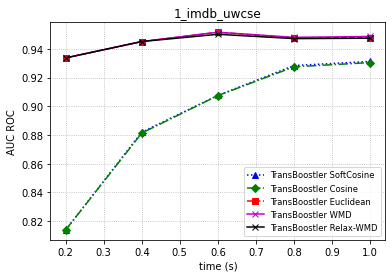

# 2_uwcse_imdb

<ipython-input-10-b14dd2163a0c>:39: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, softcosine, '^-', linestyle=':', color='b', label='TransBoostler SoftCosine')
<ipython-input-10-b14dd2163a0c>:40: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "D-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, cosine, 'D-', linestyle='-.', color='g', label='TransBoostler Cosine')
<ipython-input-10-b14dd2163a0c>:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, euclidean, 's-', linestyle='--', color='r', label='TransBoostler Euclidean')
<ipython-input-10-b14dd2163a0c>:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument an

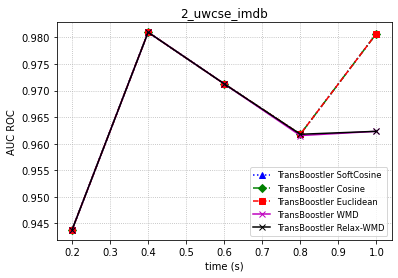

# 3_imdb_cora

<ipython-input-10-b14dd2163a0c>:39: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, softcosine, '^-', linestyle=':', color='b', label='TransBoostler SoftCosine')
<ipython-input-10-b14dd2163a0c>:40: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "D-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, cosine, 'D-', linestyle='-.', color='g', label='TransBoostler Cosine')
<ipython-input-10-b14dd2163a0c>:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, euclidean, 's-', linestyle='--', color='r', label='TransBoostler Euclidean')
<ipython-input-10-b14dd2163a0c>:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument an

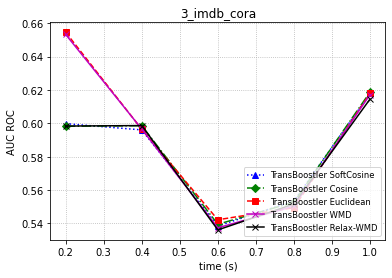

# 7_yeast_twitter

<ipython-input-10-b14dd2163a0c>:39: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, softcosine, '^-', linestyle=':', color='b', label='TransBoostler SoftCosine')
<ipython-input-10-b14dd2163a0c>:40: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "D-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, cosine, 'D-', linestyle='-.', color='g', label='TransBoostler Cosine')
<ipython-input-10-b14dd2163a0c>:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, euclidean, 's-', linestyle='--', color='r', label='TransBoostler Euclidean')
<ipython-input-10-b14dd2163a0c>:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument an

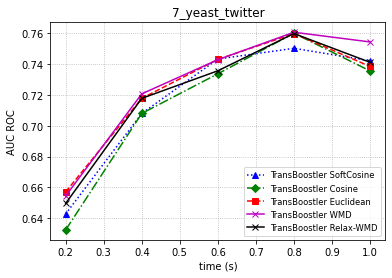

# 8_twitter_yeast

<ipython-input-10-b14dd2163a0c>:39: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, softcosine, '^-', linestyle=':', color='b', label='TransBoostler SoftCosine')
<ipython-input-10-b14dd2163a0c>:40: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "D-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, cosine, 'D-', linestyle='-.', color='g', label='TransBoostler Cosine')
<ipython-input-10-b14dd2163a0c>:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, euclidean, 's-', linestyle='--', color='r', label='TransBoostler Euclidean')
<ipython-input-10-b14dd2163a0c>:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument an

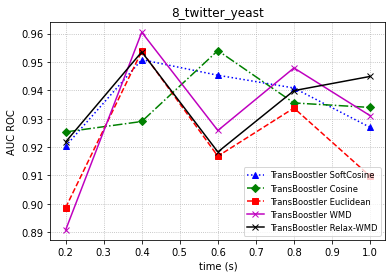

# 9_nell_sports_nell_finances

<ipython-input-10-b14dd2163a0c>:39: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, softcosine, '^-', linestyle=':', color='b', label='TransBoostler SoftCosine')
<ipython-input-10-b14dd2163a0c>:40: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "D-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, cosine, 'D-', linestyle='-.', color='g', label='TransBoostler Cosine')
<ipython-input-10-b14dd2163a0c>:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, euclidean, 's-', linestyle='--', color='r', label='TransBoostler Euclidean')
<ipython-input-10-b14dd2163a0c>:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument an

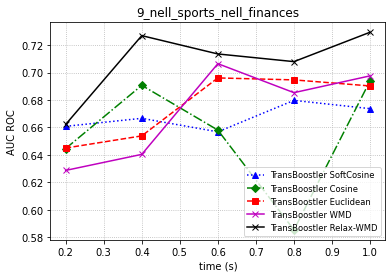

# Results for AUC PR

# 1_imdb_uwcse

<ipython-input-10-b14dd2163a0c>:39: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, softcosine, '^-', linestyle=':', color='b', label='TransBoostler SoftCosine')
<ipython-input-10-b14dd2163a0c>:40: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "D-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, cosine, 'D-', linestyle='-.', color='g', label='TransBoostler Cosine')
<ipython-input-10-b14dd2163a0c>:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, euclidean, 's-', linestyle='--', color='r', label='TransBoostler Euclidean')
<ipython-input-10-b14dd2163a0c>:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument an

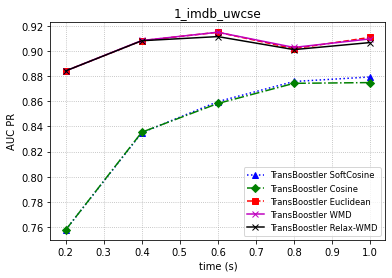

# 2_uwcse_imdb

<ipython-input-10-b14dd2163a0c>:39: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, softcosine, '^-', linestyle=':', color='b', label='TransBoostler SoftCosine')
<ipython-input-10-b14dd2163a0c>:40: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "D-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, cosine, 'D-', linestyle='-.', color='g', label='TransBoostler Cosine')
<ipython-input-10-b14dd2163a0c>:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, euclidean, 's-', linestyle='--', color='r', label='TransBoostler Euclidean')
<ipython-input-10-b14dd2163a0c>:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument an

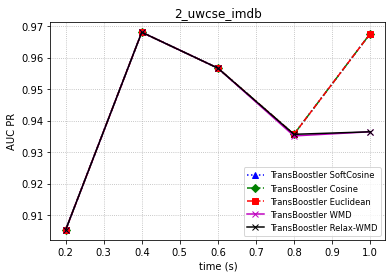

# 3_imdb_cora

<ipython-input-10-b14dd2163a0c>:39: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, softcosine, '^-', linestyle=':', color='b', label='TransBoostler SoftCosine')
<ipython-input-10-b14dd2163a0c>:40: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "D-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, cosine, 'D-', linestyle='-.', color='g', label='TransBoostler Cosine')
<ipython-input-10-b14dd2163a0c>:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, euclidean, 's-', linestyle='--', color='r', label='TransBoostler Euclidean')
<ipython-input-10-b14dd2163a0c>:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument an

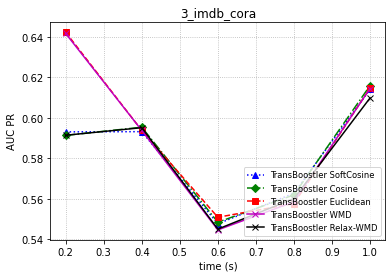

# 7_yeast_twitter

<ipython-input-10-b14dd2163a0c>:39: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, softcosine, '^-', linestyle=':', color='b', label='TransBoostler SoftCosine')
<ipython-input-10-b14dd2163a0c>:40: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "D-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, cosine, 'D-', linestyle='-.', color='g', label='TransBoostler Cosine')
<ipython-input-10-b14dd2163a0c>:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, euclidean, 's-', linestyle='--', color='r', label='TransBoostler Euclidean')
<ipython-input-10-b14dd2163a0c>:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument an

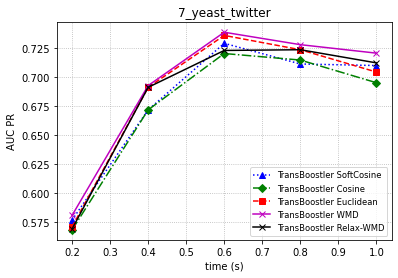

# 8_twitter_yeast

<ipython-input-10-b14dd2163a0c>:39: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, softcosine, '^-', linestyle=':', color='b', label='TransBoostler SoftCosine')
<ipython-input-10-b14dd2163a0c>:40: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "D-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, cosine, 'D-', linestyle='-.', color='g', label='TransBoostler Cosine')
<ipython-input-10-b14dd2163a0c>:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, euclidean, 's-', linestyle='--', color='r', label='TransBoostler Euclidean')
<ipython-input-10-b14dd2163a0c>:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument an

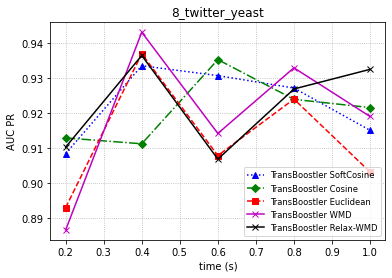

# 9_nell_sports_nell_finances

<ipython-input-10-b14dd2163a0c>:39: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "^-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, softcosine, '^-', linestyle=':', color='b', label='TransBoostler SoftCosine')
<ipython-input-10-b14dd2163a0c>:40: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "D-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, cosine, 'D-', linestyle='-.', color='g', label='TransBoostler Cosine')
<ipython-input-10-b14dd2163a0c>:41: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, euclidean, 's-', linestyle='--', color='r', label='TransBoostler Euclidean')
<ipython-input-10-b14dd2163a0c>:42: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument an

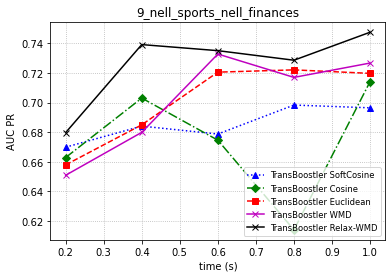

In [10]:
data = load_data(experiments, transboostler_results_filename)
for metric in ['AUC ROC', 'AUC PR']:
    display(Markdown('# Results for ' + metric))
    table = []
    for j in range(len(experiments)):
        dataset = experiments[j]['id'] + '_' + experiments[j]['source'] + '_' + experiments[j]['target']
        if dataset in data:
            display(Markdown('# ' + dataset))
            softcosine = []
            cosine = []
            euclidean = []
            wmd = []
            relax_wmd = []
            rdn_p = []
            rdn_b_p = []
            for amount in [0.2, 0.4, 0.6, 0.8, 1.0]:
                mapping_time = ''
                
                transfer_softcosine = np.array(data[dataset]['softcosine'][str(amount)][metric])
                transfer_cosine = np.array(data[dataset]['cosine'][str(amount)][metric])
                transfer_euclidean = np.array(data[dataset]['euclidean'][str(amount)][metric])
                transfer_wmd = np.array(data[dataset]['wmd'][str(amount)][metric])
                transfer_relax_wmd = np.array(data[dataset]['relax-wmd'][str(amount)][metric])

                softcosine.append(transfer_softcosine.mean())
                cosine.append(transfer_cosine.mean())
                euclidean.append(transfer_euclidean.mean())
                wmd.append(transfer_wmd.mean())
                relax_wmd.append(transfer_relax_wmd.mean())
                #rdn_p.append(scratch_rdn.mean())

            #print('TransBoostler SoftCosine %s' % transfer_softcosine)
            #print('TransBoostler Cosine %s' % transfer_cosine)
            #print('TransBoostler Euclidean %s' % transfer_euclidean)
            #print('TransBoostler WMD %s' % transfer_wmd)
            #print('TransBoostler Relax WMD %s' % transfer_relax_wmd)
            t = [0.2, 0.4, 0.6, 0.8, 1.0]
            fig, ax = plt.subplots()
            ax.plot(t, softcosine, '^-', linestyle=':', color='b', label='TransBoostler SoftCosine')
            ax.plot(t, cosine, 'D-', linestyle='-.', color='g', label='TransBoostler Cosine')
            ax.plot(t, euclidean, 's-', linestyle='--', color='r', label='TransBoostler Euclidean')
            ax.plot(t, wmd, 'x-', linestyle='-', color='m', label='TransBoostler WMD')
            ax.plot(t, relax_wmd, 'x-', linestyle='-', color='k', label='TransBoostler Relax-WMD')

            ax.set(xlabel='time (s)', ylabel=metric,
                   title=dataset)
            ax.grid(linestyle = ':')
            ax.legend(loc='lower right', fontsize='small', frameon=True)
            plt.show()
            fig.savefig("{}_{}.pdf".format(dataset, metric), bbox_inches='tight')

In [8]:
data

{'1_imdb_uwcse': {'softcosine': {'0.2': {'TP': [7, 4, 1, 5, 0],
    'FP': [2, 0, 0, 0, 0],
    'TN': [5, 4, 1, 6, 3],
    'FN': [0, 0, 0, 1, 3]},
   '0.4': {'TP': [14, 8, 3, 13, 6],
    'FP': [2, 1, 1, 2, 0],
    'TN': [12, 7, 2, 11, 6],
    'FN': [0, 0, 0, 0, 0]},
   '0.6': {'TP': [21, 12, 4, 19, 9],
    'FP': [2, 1, 0, 2, 0],
    'TN': [19, 11, 5, 17, 9],
    'FN': [0, 0, 1, 0, 0]},
   '0.8': {'TP': [28, 15, 7, 26, 12],
    'FP': [2, 0, 2, 3, 1],
    'TN': [26, 16, 5, 23, 11],
    'FN': [0, 1, 0, 0, 0]},
   '1.0': {'TP': [35, 20, 9, 33, 15],
    'FP': [4, 2, 2, 4, 1],
    'TN': [31, 18, 7, 29, 15],
    'FN': [0, 0, 0, 0, 1]}},
  'cosine': {'0.2': {'TP': [7, 4, 1, 5, 0],
    'FP': [2, 0, 0, 0, 0],
    'TN': [5, 4, 1, 6, 3],
    'FN': [0, 0, 0, 1, 3]},
   '0.4': {'TP': [14, 8, 3, 13, 6],
    'FP': [2, 1, 1, 2, 0],
    'TN': [12, 7, 2, 11, 6],
    'FN': [0, 0, 0, 0, 0]},
   '0.6': {'TP': [21, 12, 4, 19, 9],
    'FP': [2, 1, 0, 2, 0],
    'TN': [19, 11, 5, 17, 9],
    'FN': [0, 0, 1, 0, 

In [13]:
for metric in ['TP', 'TN', 'FP', 'FN']:
    display(Markdown('# Results for ' + metric))
    table = []
    for j in range(len(experiments)):
        dataset = experiments[j]['id'] + '_' + experiments[j]['source'] + '_' + experiments[j]['target']
        if dataset in data:
            #display(Markdown('# ' + dataset))
            softcosine = []
            cosine = []
            euclidean = []
            wmd = []
            relax_wmd = []
            rdn_p = []
            rdn_b_p = []
            for amount in [0.2, 0.4, 0.6, 0.8, 1.0]:
                mapping_time = ''
                transfer_softcosine = np.array(data[dataset]['softcosine'][str(amount)][metric])
                transfer_cosine = np.array(data[dataset]['cosine'][str(amount)][metric])
                transfer_euclidean = np.array(data[dataset]['euclidean'][str(amount)][metric])
                transfer_wmd = np.array(data[dataset]['wmd'][str(amount)][metric])
                transfer_relax_wmd = np.array(data[dataset]['relax-wmd'][str(amount)][metric])

                softcosine.append(transfer_softcosine.mean())
                cosine.append(transfer_cosine.mean())
                euclidean.append(transfer_euclidean.mean())
                wmd.append(transfer_wmd.mean())
                relax_wmd.append(transfer_relax_wmd.mean())
                #rdn_p.append(scratch_rdn.mean())

            table.append([dataset +'_' + str(amount), 
                '%.3f +/- %.3f' % (transfer_softcosine.mean(), 2 * transfer_softcosine.std()),
                '%.3f +/- %.3f' % (transfer_cosine.mean(), 2 * transfer_cosine.std()),
                '%.3f +/- %.3f' % (transfer_euclidean.mean(), 2 * transfer_euclidean.std()),
                '%.3f +/- %.3f' % (transfer_wmd.mean(), 2 * transfer_wmd.std()),
                '%.3f +/- %.3f' % (transfer_relax_wmd.mean(), 2 * transfer_relax_wmd.std())])
                 #             ])
    display(pd.DataFrame(table, columns=['Experiment', 'TransBoostler SoftCosine', 'TransBoostler Cosine', 'TransBoostler Euclidean', 'TransBooslter WMD', 'TransBoostler Relax WMD'])) #, 'Learning from scratch (RDN-B)']))
    #display(pd.DataFrame(table, columns=['Experiment', 'Transfer Learning', 'Transfer Learning with Revision Theory']))

# Results for TP

,Experiment,TransBoostler SoftCosine,TransBoostler Cosine,TransBoostler Euclidean,TransBooslter WMD,TransBoostler Relax WMD
0,1_imdb_uwcse_1.0,22.400 +/- 20.223,22.400 +/- 20.223,22.600 +/- 19.944,22.400 +/- 20.064,22.600 +/- 19.944
1,2_uwcse_imdb_1.0,76.400 +/- 102.173,76.400 +/- 102.173,76.400 +/- 102.173,76.400 +/- 102.173,76.400 +/- 102.173
2,3_imdb_cora_1.0,369.800 +/- 562.536,366.400 +/- 559.769,370.800 +/- 562.289,372.800 +/- 565.056,370.800 +/- 562.357
3,7_yeast_twitter_1.0,107.000 +/- 36.000,108.000 +/- 38.000,108.500 +/- 33.000,109.000 +/- 34.000,108.500 +/- 39.000
4,8_twitter_yeast_1.0,70.000 +/- 22.045,71.250 +/- 21.880,60.250 +/- 9.314,66.250 +/- 12.114,76.500 +/- 13.077
5,9_nell_sports_nell_finances_1.0,61.667 +/- 39.542,70.000 +/- 11.431,89.667 +/- 24.459,88.000 +/- 36.368,101.667 +/- 12.472


# Results for TN

,Experiment,TransBoostler SoftCosine,TransBoostler Cosine,TransBoostler Euclidean,TransBooslter WMD,TransBoostler Relax WMD
0,1_imdb_uwcse_1.0,20.000 +/- 17.889,20.200 +/- 17.817,20.400 +/- 19.457,20.800 +/- 19.325,20.400 +/- 19.457
1,2_uwcse_imdb_1.0,75.600 +/- 102.875,75.600 +/- 102.875,75.600 +/- 102.875,75.600 +/- 102.875,75.600 +/- 102.875
2,3_imdb_cora_1.0,364.800 +/- 472.114,366.800 +/- 474.344,364.400 +/- 478.402,363.000 +/- 474.433,363.400 +/- 475.428
3,7_yeast_twitter_1.0,107.500 +/- 21.000,107.500 +/- 21.000,108.000 +/- 20.000,109.000 +/- 22.000,108.500 +/- 21.000
4,8_twitter_yeast_1.0,88.250 +/- 8.761,89.250 +/- 9.631,90.500 +/- 11.874,89.250 +/- 12.278,88.250 +/- 9.937
5,9_nell_sports_nell_finances_1.0,251.667 +/- 10.625,251.000 +/- 4.320,246.000 +/- 7.118,245.333 +/- 6.600,242.667 +/- 4.989


# Results for FP

,Experiment,TransBoostler SoftCosine,TransBoostler Cosine,TransBoostler Euclidean,TransBooslter WMD,TransBoostler Relax WMD
0,1_imdb_uwcse_1.0,2.600 +/- 2.400,2.400 +/- 2.713,2.200 +/- 0.800,1.800 +/- 1.960,2.200 +/- 0.800
1,2_uwcse_imdb_1.0,0.800 +/- 1.497,0.800 +/- 1.497,0.800 +/- 1.497,0.800 +/- 1.497,0.800 +/- 1.497
2,3_imdb_cora_1.0,183.200 +/- 383.263,181.200 +/- 384.269,183.600 +/- 389.134,185.000 +/- 385.219,184.600 +/- 387.531
3,7_yeast_twitter_1.0,33.500 +/- 9.000,33.500 +/- 9.000,33.000 +/- 10.000,32.000 +/- 8.000,32.500 +/- 9.000
4,8_twitter_yeast_1.0,4.000 +/- 7.071,3.000 +/- 6.164,1.750 +/- 2.958,3.000 +/- 2.449,4.000 +/- 6.000
5,9_nell_sports_nell_finances_1.0,7.667 +/- 8.994,8.333 +/- 2.494,13.333 +/- 6.182,14.000 +/- 4.899,16.667 +/- 3.771


# Results for FN

,Experiment,TransBoostler SoftCosine,TransBoostler Cosine,TransBoostler Euclidean,TransBooslter WMD,TransBoostler Relax WMD
0,1_imdb_uwcse_1.0,0.200 +/- 0.800,0.200 +/- 0.800,0.000 +/- 0.000,0.200 +/- 0.800,0.000 +/- 0.000
1,2_uwcse_imdb_1.0,0.000 +/- 0.000,0.000 +/- 0.000,0.000 +/- 0.000,0.000 +/- 0.000,0.000 +/- 0.000
2,3_imdb_cora_1.0,233.600 +/- 510.463,237.000 +/- 506.126,232.600 +/- 508.987,230.600 +/- 514.437,232.600 +/- 509.014
3,7_yeast_twitter_1.0,34.000 +/- 6.000,33.000 +/- 8.000,32.500 +/- 3.000,32.000 +/- 4.000,32.500 +/- 9.000
4,8_twitter_yeast_1.0,22.250 +/- 17.110,21.000 +/- 14.560,32.000 +/- 19.339,26.000 +/- 25.338,15.750 +/- 5.723
5,9_nell_sports_nell_finances_1.0,197.667 +/- 40.738,189.333 +/- 12.684,169.667 +/- 24.998,171.333 +/- 37.854,157.667 +/- 14.267
